# Hands-On: Deep Neural Networks with Keras and Tensorflow


## Motivation/Zielsetzung
* Schnelleinstieg in Deep Learning mit Open Source Tools
* Einführung in Architektur von NN - Parameterauswahl
* Ziel: Einfachen Klassifikator für eigene Daten


## Überblick
* Tools 
* Workflow (Keras)
* Convolutional Neural Network 
    * Transfer Learning
* Demo: Klemmen Klassifikator (einfach gehalten)
* Anwendungsgebiete (Wago?) 
* GitHub Repo (todo: entscheide kurz vor schluss)

***

# Tools: Python, Jupyter, Tensorflow, Keras

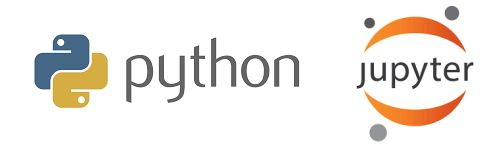

## Python
* stark verbreitet: 
    * Vielfalt an Libs (Std, 3rd: OpenCv, Matplotlib, ...) 
* Anwendungsgebiet Data Science:
    * dynamisch (Interpreter)
    * Prototyping
    * Fokus auf Daten/Algorithmen

## Jupyter
* web-basiert/markdown/Browser
* Cells: Ausführbarer Code und Doku gemischt

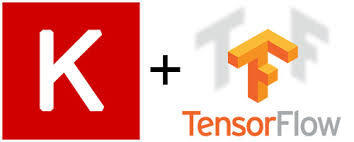

## Tensorflow

* Google’s OpenSource DL framework 
    * Google Translate
* C++/Python Api
* Raspberry Pi, Android, (PFC?)
* http://playground.tensorflow.org
* Tensorboard: Visualisierung

## Keras

* high-level Deep Learning Framework
* häufig angewendet bei Kaggle.com Wettbewerben
* ursprünglich entwickelt für Froscher
* Verschiedene Backends: (für Tensor Operationen)
    * Theano, Tensorflow, CNTK, (MxNet)
    * Bestandteil von TensorFlow ab 1.4
* Schnellstart
    * viele Parameter voreingestellt
    * einfach Layer zusammenstellen
* GitHub: https://github.com/fchollet/keras

***

# Tensor

* todo übergang flüssig auch numpy
* Kontainer für numerische Daten
* NumPy arrays
* "__Tensorflow__":
    * __tensors flow through data flow graphs and are altered by operations__
    * Layer: tensor operations
    
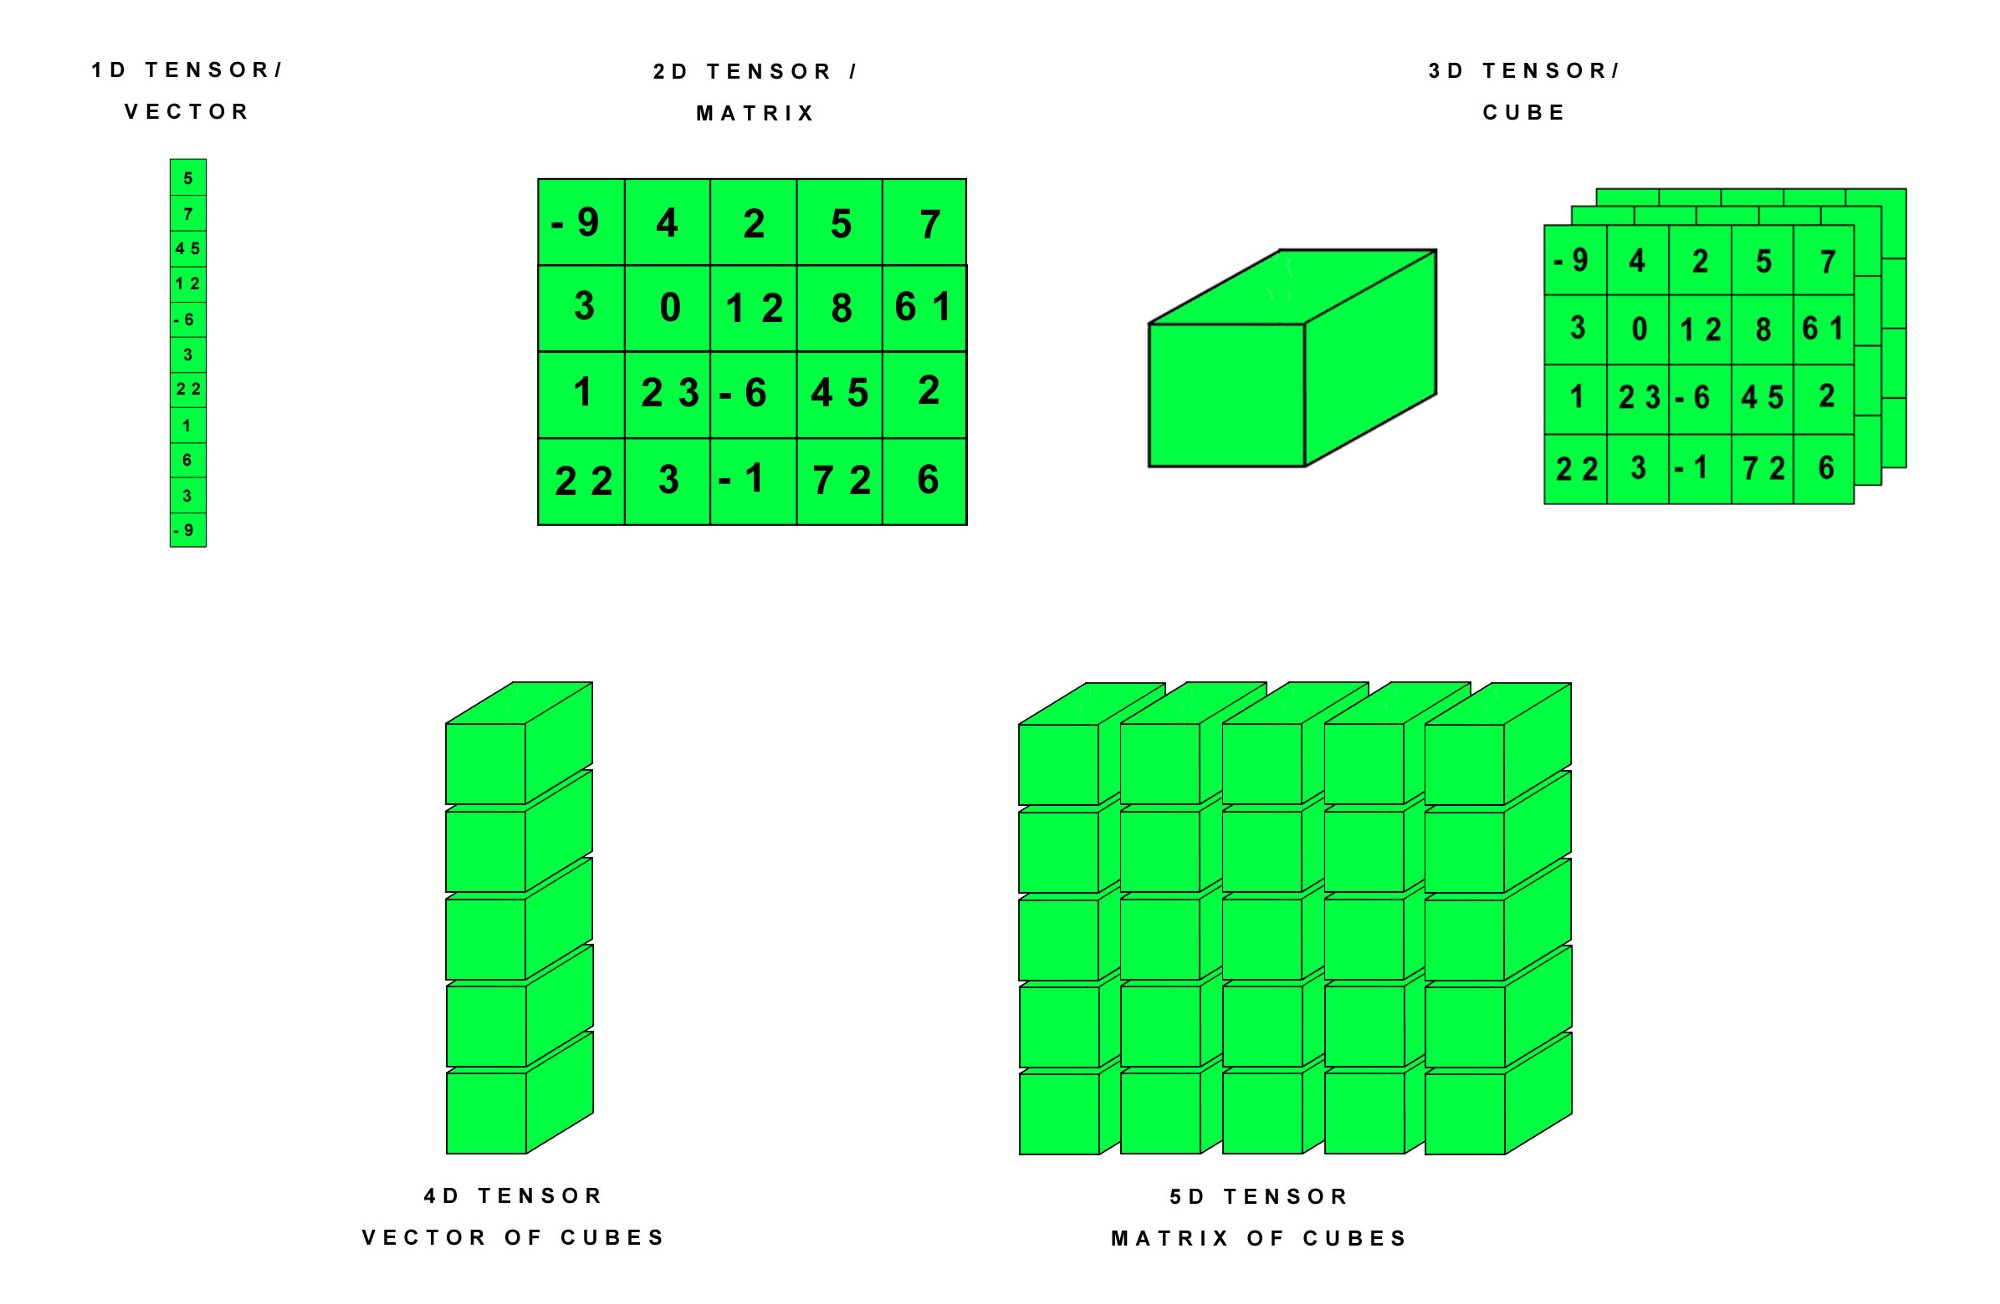

* Beispiele:
    * 4D Images: (sample_size, width, heigth, channel)
    * 5D Video : (sample_size, frames, width, height, color_depth)

***

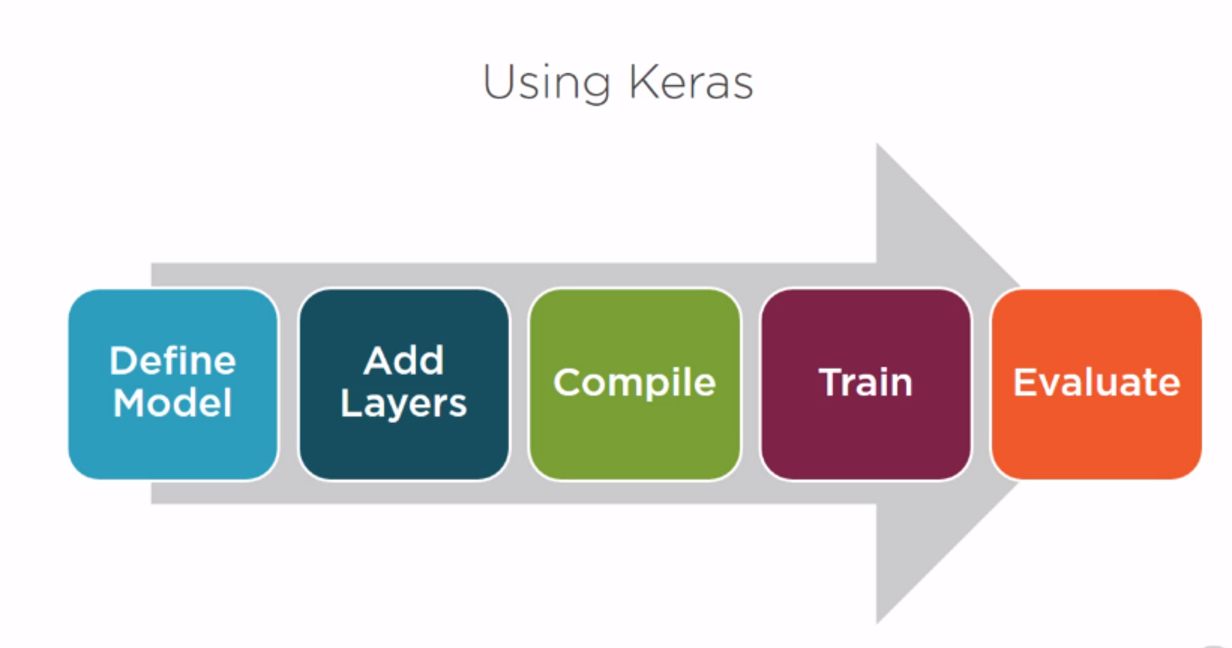


# Keras Workflow


In [ ]:
import numpy as np
from keras.models import Sequential

# Datensatz laden
X_train, Y_labels = np.load('training_set_with_labels.npy')

# Define ModelModel Design: 
model = Sequential()
# Add Layers
model.add(...)
[...] # Model Architektur

# Compile: Graph aufbauen
model.compile()

# Train: Model auf Datensatz trainieren
model.fit(X_train, Y_labels)

# Model evaluieren auf neuen Daten: loss, accuracy 
model.evaluate(...)

# Model Vorhersage auf neuen Werten ohne Label
model.predict(...)

### Daten vorbereiten

* Definiere Input/Output Tensors (zb sensordaten)
* Daten ggf. kodieren in Tensor
* Normieren (verbessert die Performance)
* Keras: einige Datensätze mitgeliefert 
    * image classification:MNIST database of handwritten digits
    * sentiment classification: IMDB Movie reviews 
    * regression: Boston housing price 
    

### Definiere ein Model (Netz von Layern) 
functional entfernen auch code weg

* __Model (functional API)__
    * multi-input / multi-output models

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

a = Input(shape=(32,))
b = Dense(32)(a)
model = Model(inputs=a, outputs=b)
# multi input/output
model = Model(inputs=[a1, a2], outputs=[b1, b3, b3]) 

* __Sequential__ todo bild
    * Stack von Schichten: Jede Layer leitet die Ausgabe direkt in den Input der nächsten weiter

In [ ]:
from keras.models import Sequential

model = Sequential() todo
model.add(Dense(32, input_shape=(784,))) besseres beispiel 
model.add(Activation('relu'))
# andere Schreibweise:
model.add(Dense(32,input_shape=(784,), activation='relu'))

# Layers

##### Core layers
* <font color ='blue'>Dense
* Dropout
* Flatten
* Activation</font>

##### CNN layers
* <font color ='green'>Conv2d
* MaxPooling2D</font>


# Activation 
* jede layer braucht eine sonst linear todo
    * bisher: zwei lineare Operationen - Skalarprodukt und Addition 
    * output = dot(W, input) + b
    * nur lineare Transformationen der Input Daten
    * benötigt wird zusätzlich noch eine <font color = blue> Aktivierungsfunktion für Nichtlinearität </font>
    
### Aktivierungsfunktionen:
* Linear (default, output durchreichen, liner regression)
* ReLu 
    * vanishing gradient, einfache Ableitung
* Softmax 
    * Wahrscheinlichkeitsverteilung der Klassen (summiert sich zu 1) 
* Sigmoid 
    * Output wird auf 0 bis 1 normiert
    
# Compile
* Tensorflow Graph wird aufgebaut (operators and tensors)

### loss:

* Die Größe die minimiert werden soll während des Trainings
* Maß für den Erfolg des Models die Aufgabe zu lösen
    
### optimizer:

* Auf welche Art der Gradient des Fehlers verwendet wird um die Gewichte/Parameter zu aktualisieren
* RMSprop, SGD, ...

### metrics:
* Monitoring welche Größen ausgegeben werden sollen
    
# Fit 
* Iteration über die Trainingsdaten
* Batch : Menge an Trainingsdaten auswerten bevor das Netz (Gewichte) aktualisiert werden soll

# Evaluate 
* Auswertung auf ungesehene Daten/ Generalisierungsfähigkeit
* score = model.evaluate(X_test, Y_test, verbose=0)


# Zusammenfassung Lernprozess
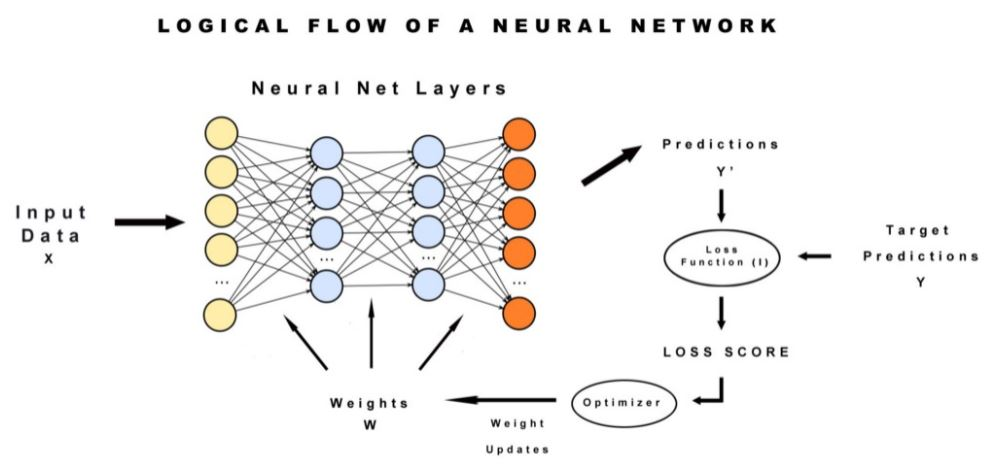
* Ergebnis bewerten? Wann ist ein Netz gut? 
    * Generalisierungsfähigkeit auf noch nie gesehene Daten

## Tensorboard

* gesamten trainierten Graphen anzeigen
* Metriken anzeigen
* tensorboard --logdir=logs_vgg


# Overfitting

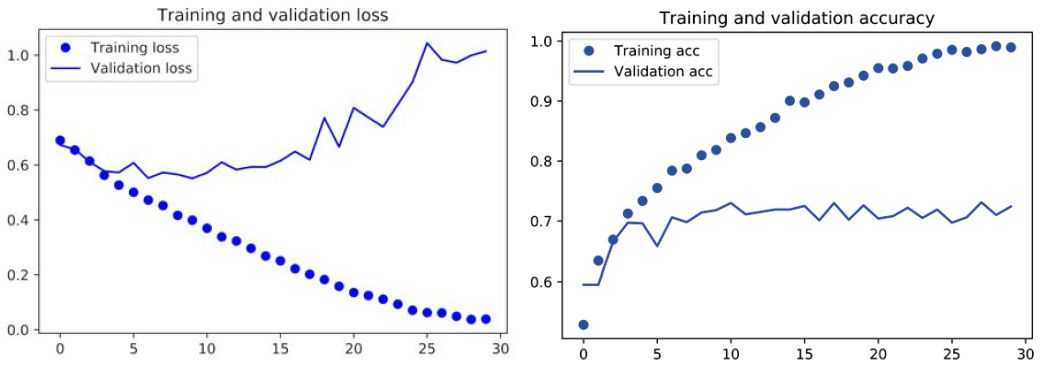
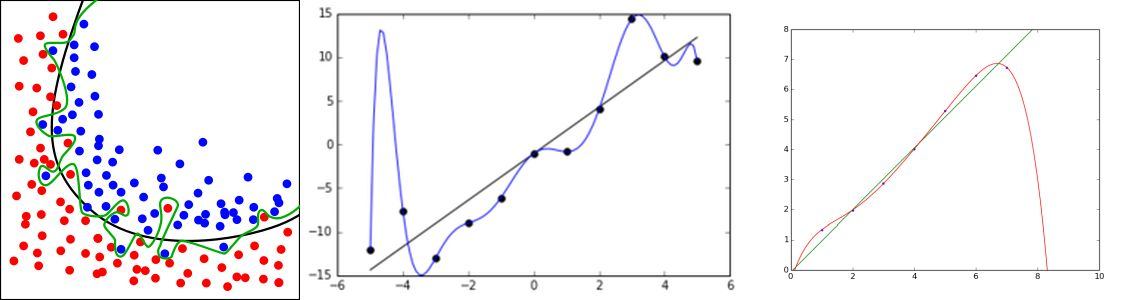


## Strategien gegen Overfitting

* Mehr Daten! zB Image augmentation
* andere Netz Architektur (zuviele Freiheitsgrade (Neuronen))
* Dropout

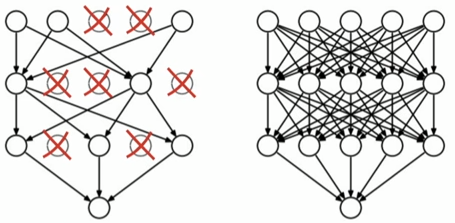
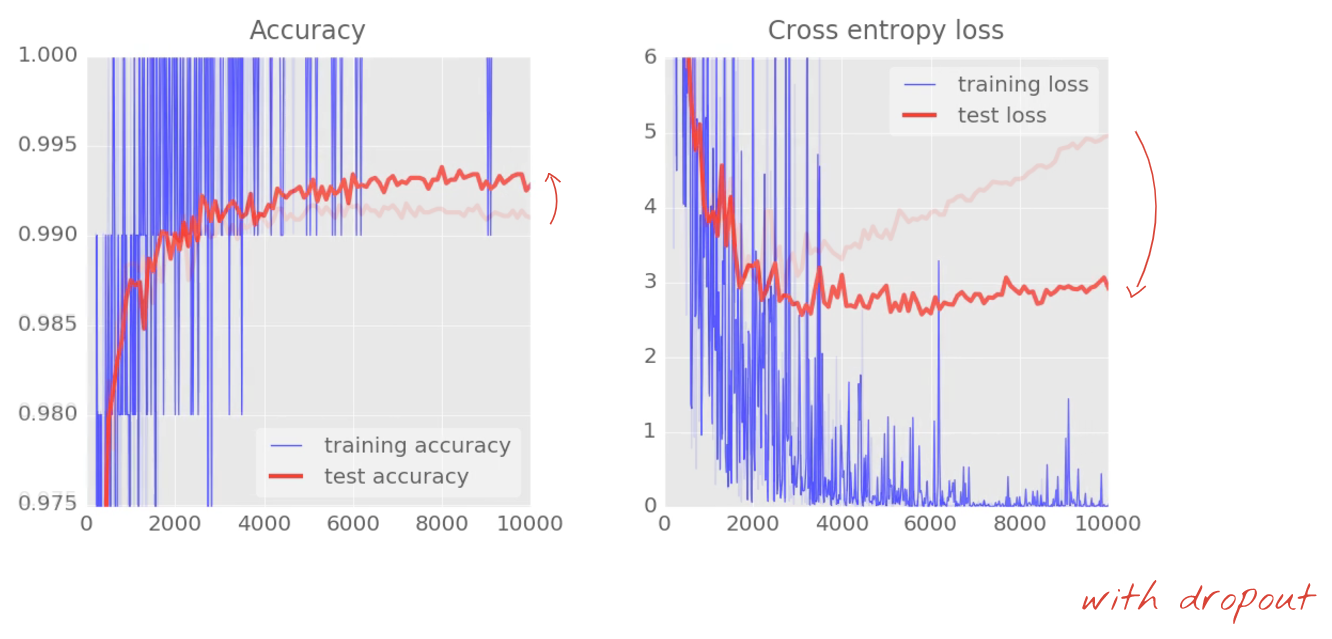
* Regularization: Gewichte klein halten



# Erfahrungswerte Parameterwahl

* Hinweis: Universelle Funktionsapproximation erreichbar mit einem MLP
    * Dictionary-like mapping bei zuvielen Freiheitsgraden
    
* Vorgehen beim Aufbauen einer Netzarchitektur:
    * Model erstellen das overfittet
    * Hyperparameter tuning
        * Learning rate decay
 
* Performance des Netzes immer mit bisher ungesehenen Daten bewerten
 
### Binäre Klassifikation (zwei output Klassen) 
 * Dense layer mit ReLu decken die meisten Gebiete ab
 * am Ende: Dense layer mit einem Neuron und Sigmoider Aktivierungsfunktion
 * loss: binary_crossentropy
 * optimizer: RMSprop
 
 
### Multi Klassifikation (n output Klassen)
 * am Ende Dense layer mit n Neuronen und Softmax Aktivierungsfunktion
 * loss: categorical_crossentropy
        
   

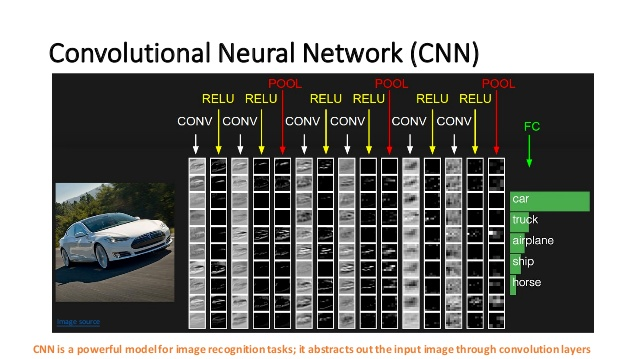

### hierarchisches Vision System
* Start mit Kanten and Ecken
* Shapes: Formen/Umrisse
* komplexe Strukturen
* Gesichter

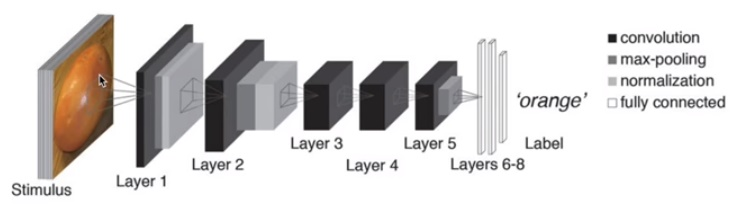
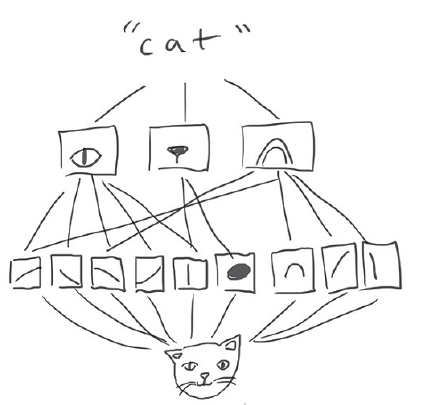
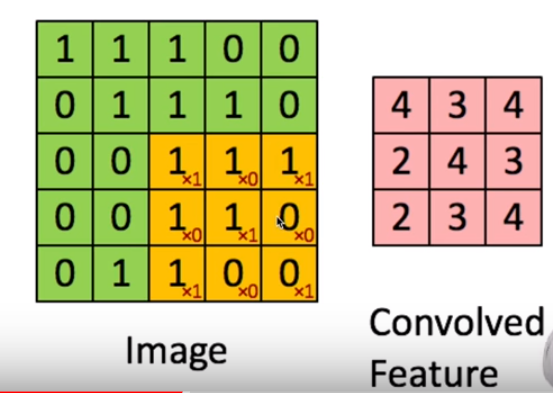


### Response map
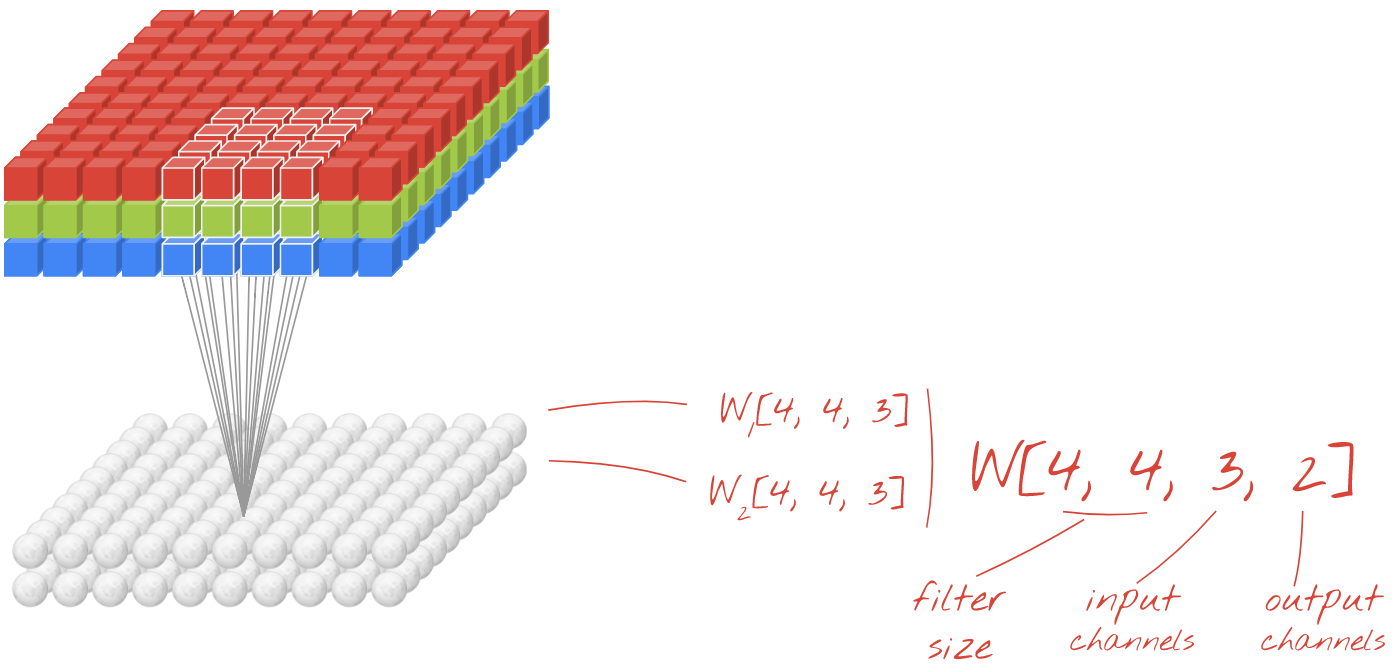

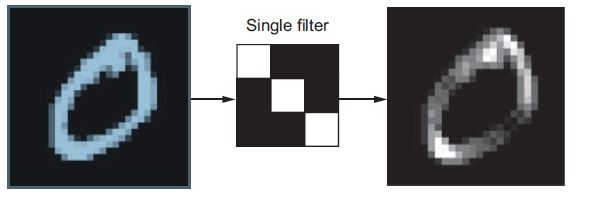




In [ ]:
# Model from scratch

from keras import layers
from keras import models

# Cage Clamp: Model from scratch
model = models.Sequential()
 
#e.g. input_shape=(224, 224, 3) for 224x224 RGB pictures
model.add(layers.Conv2D(32, (3, 3), activation='relu',  input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(num_categories, activation='sigmoid'))

model.summary()

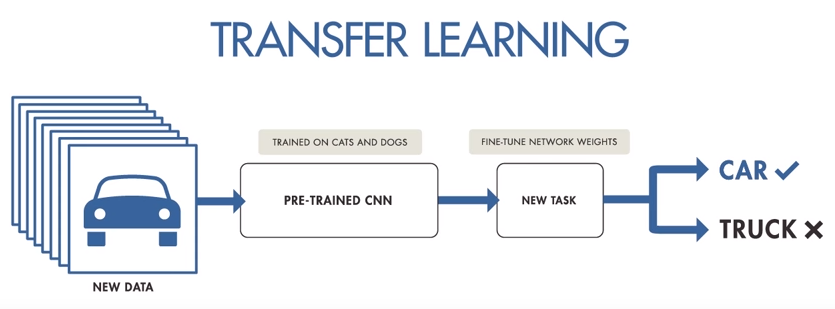

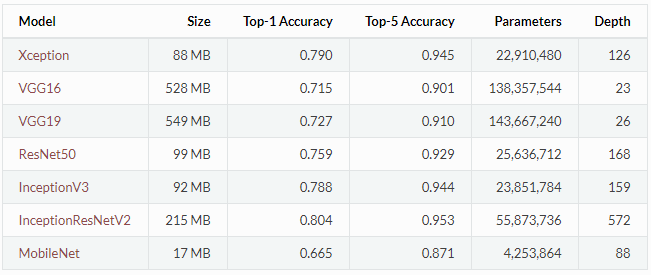

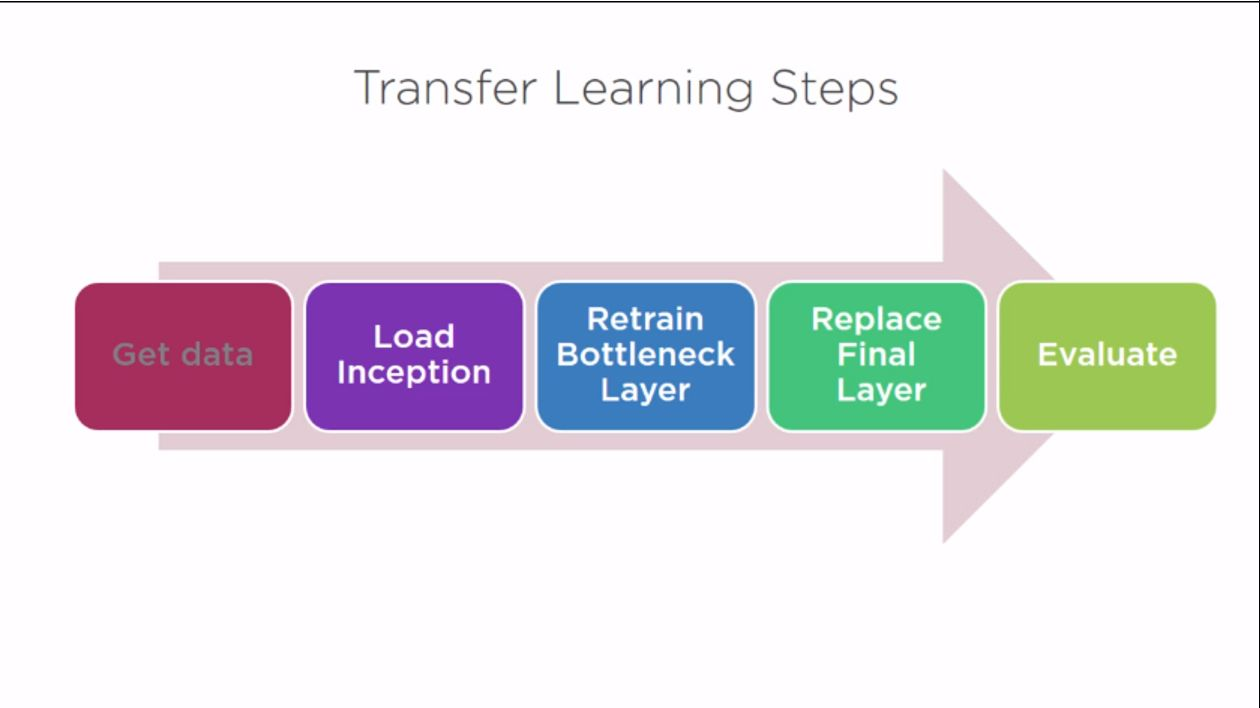

In [3]:
from keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet', include_top=False)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in conv_base.layers[:249]:
    layer.trainable = False
for layer in conv_base.layers[249:]:
    layer.trainable = True


# if layer.name == 'block5_conv1':
#     layer.trainable = True
    
conv_base.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
conv2d_189 (Conv2D)              (None, None, None, 32 864         input_3[0][0]                    
____________________________________________________________________________________________________
batch_normalization_189 (BatchNo (None, None, None, 32 96          conv2d_189[0][0]                 
____________________________________________________________________________________________________
activation_189 (Activation)      (None, None, None, 32 0           batch_normalization_189[0][0]    
___________________________________________________________________________________________

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='softmax'))

model.summary

# Zusammenfassung:

#### Convnets: 
* selbst bei kleinen Datensätzen aktuell das Mittel der Wahl bei Computer Vision Aufgaben
* Wiederverwendbarkeit bisheriger Modelle
* Overfitting bei Bildklassifizierung bekämpfen:
    * Image augmentation
* <font color=red >Gefahr: vanishing gradient </font>...gerade die Strukturen in den frühen Layern wichtig (Kanten/Ecken) => Lösung ReLu Aktivierungsfunktion
* Dense layer: Globale Muster (alle Pixel)
* Convolution layer: Lokale Muster (2d Fenster)
    * Translations invariant (wird an einer Stelle gelernt, kann überall wieder erkannt werden)
    * erlernt räumliche Hierarchien

# Demo: Prediction (siehe cc_prediction Notebook)


valid_result

MobileNet
['loss', 'acc']
[0.057688838936862226, 0.98843930877013009]

Inception
['loss', 'acc']
[0.11615606763459355, 0.95086704961137281]


Scratch
['loss', 'acc']
[0.049340252115827245, 0.98265895884850119]


Internet

MobileNet
['loss', 'acc']
[0.14218172218118394, 1.0]

Inception
['loss', 'acc']
[1.2196208238601685, 0.4285714328289032]

Scratch
['loss', 'acc']
[11.857521057128906, 0.1428571492433548]


Samples

MobileNet
['loss', 'acc']
[0.074494205415248871, 0.92857140302658081]

Inception
['loss', 'acc']
[0.0058887147211602753, 1.0]

Scratch
['loss', 'acc']
[0.0013992555738825882, 1.0]


# Anwendungsgebiete

* Verarbeitung von rohen Sensordaten
* Anomalieerkennung
* Energieeinsparung

# Vorgehen
* Fog: (Model trainieren in Cloud und anwenden im Gerät)

In [ ]:
Notes

For instance, a 60-second, 256x144 YouTube video clip sampled at 4 frames per
second would have 240 frames. A batch of 4 such video clips would be stored in a tensor
of shape (4, 240, 256, 144, 3). That’s a total of 106,168,320 values! If the dtype of
the tensor is float32, then each value is stored in 32 bits, so the tensor would
represent 425MB.

Fully connected layers are fantastic for solving all kinds of problems. Unfortunately they don’t scale very well for image recognition. So we’ll build our system using convolutional layers, which are unique because they don’t connect all the neurons together.


As the information flows through the layers, the system finds more and more complex patterns, like textures, and eventually it deduces various object classes.


Here’s what you need to know about pooling layers. Their goal is simple. They do subsampling. In other words they shrink the input image, which reduces the computational load and memory usage. With less information to crunch we can work with the images more easily.

Weights are the strength of the connection between the various neurons.


At this point, you know that machine learning is about mapping inputs (e.g. images) to
targets (e.g. the label "cat"), which is done by observing many examples of input and
targets. You also know that deep neural networks do this input-to-target mapping via a
deep sequence of simple data transformations (called "layers"), and that these data
transformations are learned by exposure to examples.


* Google "TPU" project (tensor processing unit):
    * chip to run deep neural networks (10x faster and far more energy-efficient than top-of-line GPUs.)

tensors, tensor operations, differentiation, gradient descent…
 At TensorFlow Summit 2017, a researcher showed how they’re using a convnet to detect skin cancer as well as a dermatologist with a smart phone!
 In image processing pattern recognition is known as feature extraction.
 
 
 kein feature engineering
 They called these early AI’s “expert systems.”
The linguists sat down and puzzled out a dizzying array of if, then, unless, except statements:
Does a bird fly?Yes
Unless it’s:Dead Injured A flightless bird like a Penguin Missing a wing
These lists of rules and exceptions are endless. Unfortunately they’re also terribly brittle and prone to all kinds of errors. They’re time consuming to create, subject to debate and bias, hard to figure out, etc.
Deep neural networks represent a real breakthrough because instead of you having to figure out all the steps, you can let the machine extract the key features of a cat automatically.

Today we can stack many layers together hence the “deep” in deep learning.


Receptive field this where we apply a convolution to
	- Different than fully connected layers
	- Slides over the image 
	- Apply a weight matrix of the layer over the image iteratively

One conv block : filter,relu pooling
	- At the end flatten and fully connect
	- Two parts: conv blocks and classification
	
	
	Pooling 
	most relevant parts of the image
	
	
Activation relu make the model learn non linear functions


Dropout
Turn neurons on and off randomly
Network is forced to learn other representation for the data new pathways
Prevent overfitting![image.png](attachment:image.png)

(Kernel=featuremap=filter=weight=matrix)




<font color=blue|red|green|pink|yellow>Text</font>
So the number of parameters is 5 * 5 * 32 * 64 + 64 = 51264.

Indenting: Use a greater than sign (>) 

Horizontal lines: Use three asterisks: ***
L1 and L2 Regularization These regularization methods prevent overfitting by imposing a penalty on the coefficients.

binary_crossentropy loss. It isn’t the only viable choice: you could use, for instance,
mean_squared_error. But crossentropy is usually the best choice when you’re dealing
with models that output probabilities. Crossentropy is a quantity from the field of Information
Theory that measures the distance between probability distributions or, in this
case, between the ground-truth distribution and your predictions.



This is because a deep-learning model is just a chain of simple, continuous geometric
transformations mapping one vector space into another.
    
In general, anything that requires
reasoning—like programming or applying the scientific method—long-term planning,
and algorithmic data manipulation is out of reach for deep-learning models, no
matter how much data you throw at them. Even learning a sorting algorithm with a
deep neural network is tremendously difficult.
    
    
deep learning has solved perception
Given sufficient
training data (in particular, training data appropriately labeled by humans), it’s possible
to extract from perceptual data almost anything that a human could extract.

One thing is certain: in stark contrast with previous AI summers,
deep learning has provided enormous business value to a number of large technology
companies, enabling human-level speech recognition, smart assistants, human-level

image classification, vastly improved machine translation, and more. The hype may
(and likely will) recede, but the sustained economic and technological impact of deep
learning will remain.

vergleich mit dem internet - weil es eben schon einen value hat


Models: continuous geometric transformations of the input data we currently work
with


AlphaGo (a system that required
a lot of manual software engineering and human-made design decisions)



Deep learning is one of many branches of machine learning, where the models are
long chains of geometric functions, applied one after the other. These operations are
structured into modules called layers: deep-learning models are typically stacks of layers—
or, more generally, graphs of layers. These layers are parameterized by weights,
which are the parameters learned during training. The knowledge of a model is stored
in its weights, and the process of learning consists of finding good values for these
weights.


Now, it
turns out that all you need is sufficiently large parametric models trained with gradient
descent on sufficiently many examples. As Feynman once said about the universe,
“It’s not complicated, it’s just a lot of it.”1